In [4]:
# importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset
file_path = "TASK-ML-INTERN.csv"  # load the data set
df = pd.read_csv(file_path)

# summary of the data with statistics
print(df.info())    
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  

# TASK 1

In [6]:
# checking missing value
print("Missing values:\n", df.isnull().sum())

Missing values:
 hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


Original Data Shape: (500, 450)
Filtered Data Shape (After Outlier Removal): (388, 450)


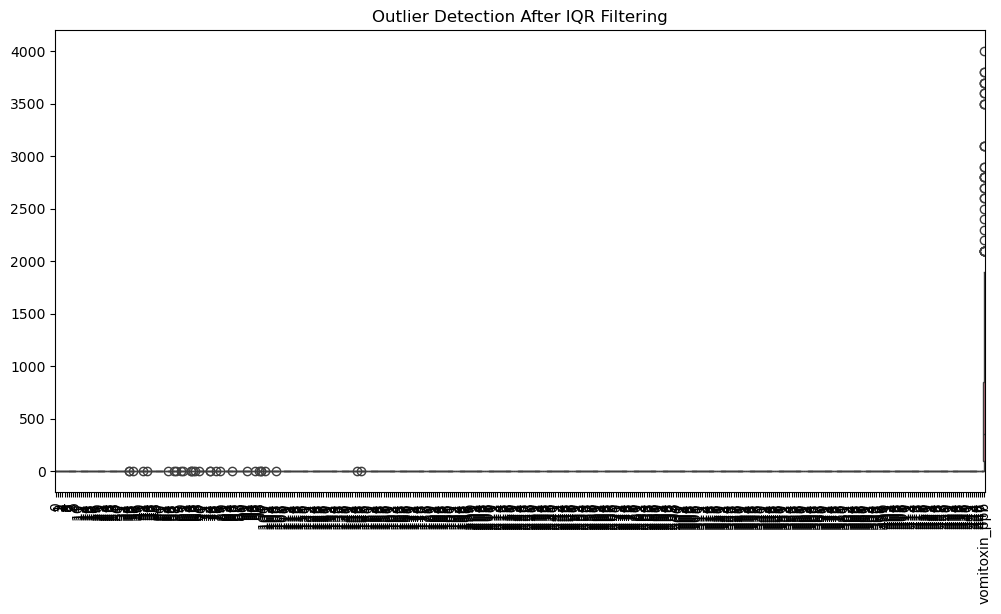

In [8]:
# to detect outliers
Q1 = df.iloc[:, 1:].quantile(0.25)   # first quartile
Q3 = df.iloc[:, 1:].quantile(0.75)   # third quartile
IQR = Q3 - Q1  # interquartile range

# upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[~((df.iloc[:, 1:] < lower_bound) | (df.iloc[:, 1:] > upper_bound)).any(axis=1)]

# print actual data and after removing outliers
print(f"Original Data Shape: {df.shape}")
print(f"Filtered Data Shape (After Outlier Removal): {df_filtered.shape}")

# Replot Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered.iloc[:, 1:])
plt.xticks(rotation=90)
plt.title("Outlier Detection After IQR Filtering")
plt.show()

In [10]:
scaler = StandardScaler()  # Use MinMaxScaler() for normalization
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])

# Add back non-numeric columns if needed
df_scaled.insert(0, df.columns[0], df.iloc[:, 0])

print(df_scaled.head())


           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0 -0.602959 -0.965751 -0.543093 -1.157165 -0.742877 -1.052805   
1  imagoai_corn_1 -0.611562 -0.831331 -0.683547 -0.654183 -0.480564 -0.510221   
2  imagoai_corn_2 -1.210868 -1.529537 -1.328061 -1.135296 -1.277202 -1.403752   
3  imagoai_corn_3  0.575693  0.714559  0.637270  0.721659  0.940964  1.060639   
4  imagoai_corn_4  0.900614  1.022832  0.772988  1.336847  0.992857  0.866564   

          6         7         8  ...       439       440       441       442  \
0 -1.138474 -1.291257 -1.128080  ... -0.579796 -0.435043 -0.472136 -0.641236   
1 -0.678841 -0.826155 -0.462121  ... -1.071488 -0.811826 -0.715506 -0.814737   
2 -1.618288 -1.577331 -1.492895  ... -1.089395 -1.333533 -1.437541 -1.186149   
3  1.176304  0.638522  0.488863  ...  0.028574 -0.186753 -0.068313 -0.181179   
4  1.177082  0.936845  0.737234  ...  0.542282  0.600180  0.390096  0.442627   

        443       444       445 

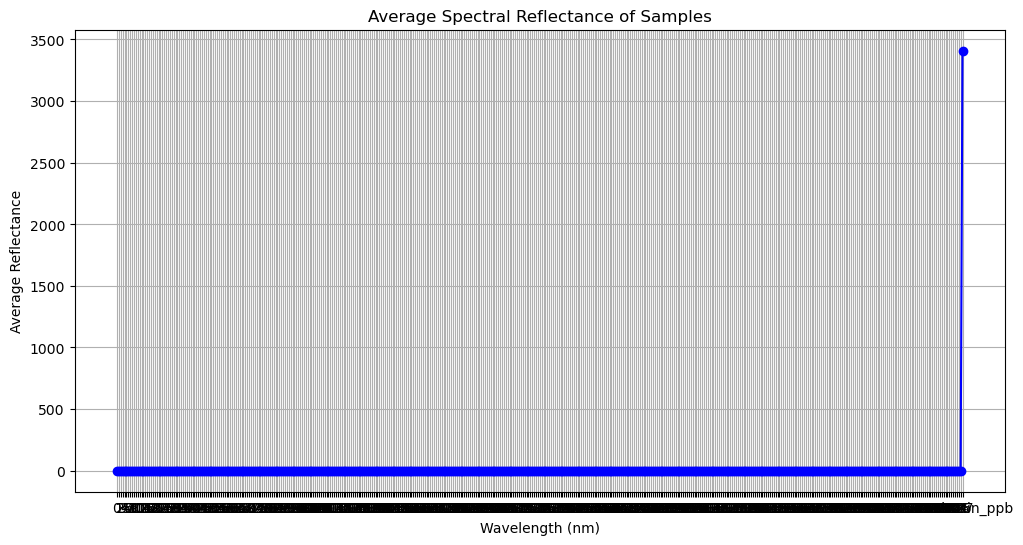

In [12]:
# Assume DataFrame is spectral data
numeric_df = df.select_dtypes(include=[np.number])  # only numeric columns
avg_reflectance = numeric_df.mean()  # Compute average reflectance for each wavelength

# Plot the average reflectance curve
plt.figure(figsize=(12, 6)) # figure size
plt.plot(avg_reflectance.index, avg_reflectance.values, marker='o', linestyle='-', color='b')
plt.xlabel("Wavelength (nm)") # x-axis
plt.ylabel("Average Reflectance") # y-axis
plt.title("Average Spectral Reflectance of Samples") # title
plt.grid(True) # add grid
plt.show() #display

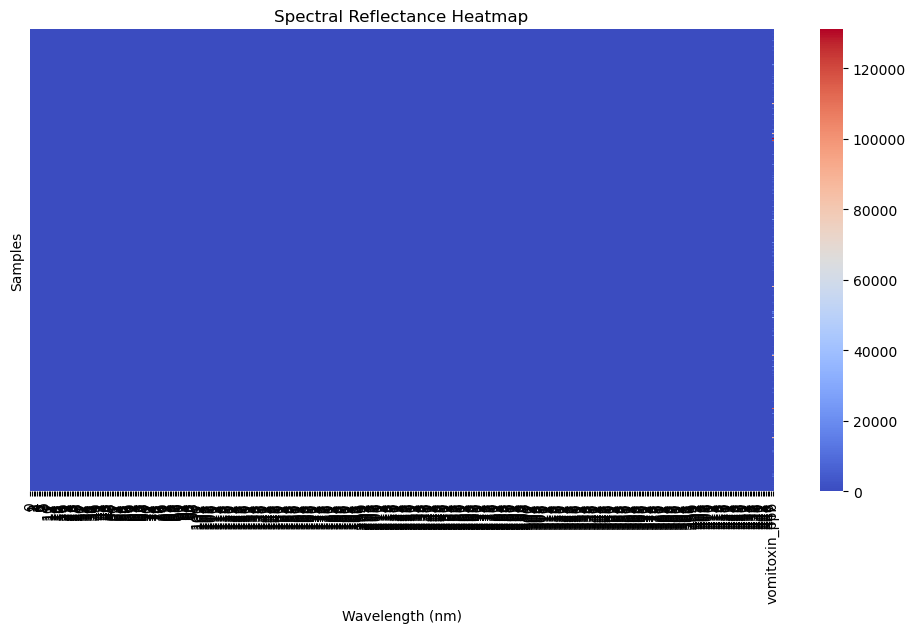

In [14]:
plt.figure(figsize=(12, 6)) # figure size
# Create a heatmap to visualize spectral reflectance across samples
sns.heatmap(numeric_df, cmap="coolwarm", xticklabels=True, yticklabels=False) 
plt.xlabel("Wavelength (nm)") # x-axis
plt.ylabel("Samples") # y-axis
plt.title("Spectral Reflectance Heatmap") # title
plt.show() # display

# TASK 2

Explained Variance Ratio: [0.86888453 0.05861011 0.02172249]


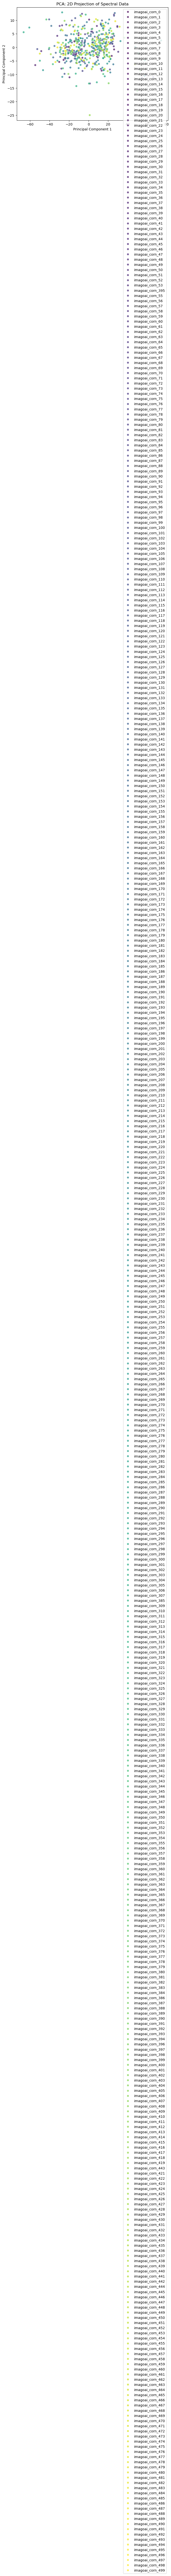

In [18]:
# importing PCA from scikit-learn
from sklearn.decomposition import PCA

# Standardize data (already scaled, so we use df_scaled)
pca = PCA(n_components=3)  # Reduce to 3 components
# Apply PCA to the scaled dataset
pca_result = pca.fit_transform(df_scaled.iloc[:, 1:])

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

# Create dataframe for PCA result 
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3"])
pca_df["Label"] = df.iloc[:, 0]  # add original labels

# 2D Scatter Plot
plt.figure(figsize=(8, 6))
# plot of PCA result using 2 principal
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["Label"], palette="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: 2D Projection of Spectral Data")
plt.legend() 
plt.show()


Principal Component 1: 0.8689 (86.89%)
Principal Component 2: 0.0586 (5.86%)
Principal Component 3: 0.0217 (2.17%)
Principal Component 4: 0.0113 (1.13%)
Principal Component 5: 0.0023 (0.23%)

Cumulative Variance Explained by First 3 Components: 94.92%


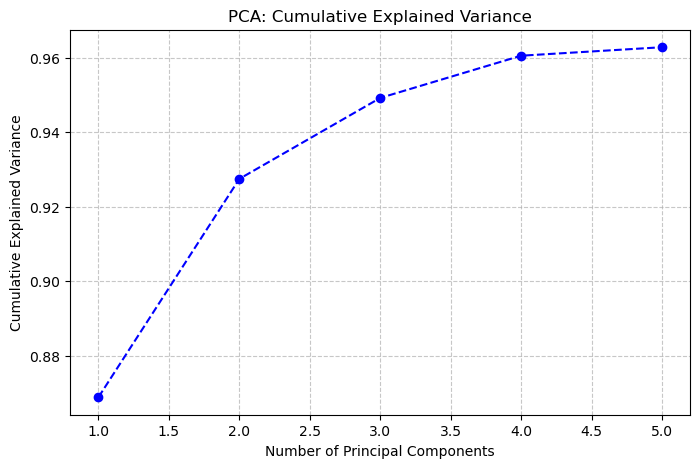

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5)  # Select more components if needed
pca_result = pca.fit_transform(df_scaled.iloc[:, 1:])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_  # variance by each principal
cumulative_variance = np.cumsum(explained_variance) # cumulative sum of explained variance

# Print variance explained by each component
for i, var in enumerate(explained_variance, 1):
    print(f"Principal Component {i}: {var:.4f} ({var * 100:.2f}%)")

print(f"\nCumulative Variance Explained by First 3 Components: {cumulative_variance[2] * 100:.2f}%")

# Plot variance explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Cumulative Explained Variance")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


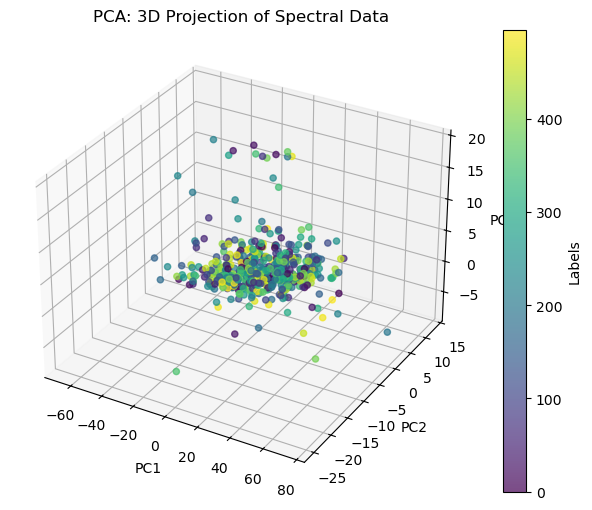

In [22]:
# Import 3D plotting toolkit for Matplotlib
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d') # add 3d subplot
# PCA results with color representing different labels
sc = ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], c=pca_df["Label"].astype('category').cat.codes, cmap="viridis", alpha=0.7)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA: 3D Projection of Spectral Data")
plt.colorbar(sc, label="Labels") # color bar to indicate class labels
plt.show()


# TASK 3

In [29]:
!pip install tensorflow


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset 
file_path = "TASK-ML-INTERN.csv"  # Update with actual file path
df = pd.read_csv(file_path)# Replace with your dataset

# extract features and labels
X = df.iloc[:, 1:].values  # select all columns except first
y = df.iloc[:, 0].values   # select first column

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print shapes of the training data
print("X_train shape:", X_train.shape) # training feature
print("y_train shape:", y_train.shape) # training label


X_train shape: (400, 449)
y_train shape: (400,)


In [26]:
import tensorflow as tf # tensorflow used for deep learning
from tensorflow import keras # keras used for building models

# Define the MLP model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),  # Hidden layer 1
    keras.layers.Dense(32, activation='relu'),  # Hidden layer 2
    keras.layers.Dense(len(np.unique(y)), activation='softmax')  # Output layer (for classification)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          57,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 497)                 │          16,401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,337 (329.44 KB)

 Trainable params: 84,337 (329.44 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# encoding categorical labels
from sklearn.preprocessing import LabelEncoder

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert string labels to numeric

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
# Train the  MLP model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.0000e+00 - loss: 6.2399 - val_accuracy: 0.0000e+00 - val_loss: 6.2326
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 6.1669 - val_accuracy: 0.0000e+00 - val_loss: 6.3296
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0063 - loss: 6.0937 - val_accuracy: 0.0000e+00 - val_loss: 6.6051
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0073 - loss: 5.9521 - val_accuracy: 0.0000e+00 - val_loss: 7.0725
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0101 - loss: 5.7583 - val_accuracy: 0.0000e+00 - val_loss: 7.7415
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0165 - loss: 5.4729 - val_accuracy: 0.0000e+00 - val_loss: 8.6042
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0191 - loss: 5.2137 - val_accuracy: 0.0000e+00 - val_loss: 9.6149
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0286 - los

In [30]:
# Evaluate trained model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.0000e+00 - loss: 48.5062
Test Accuracy: 0.0000


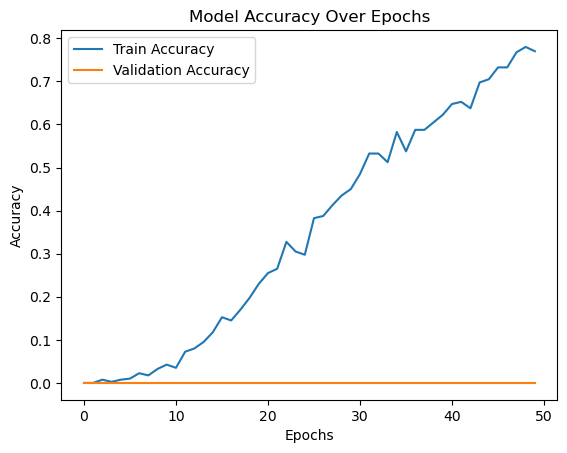

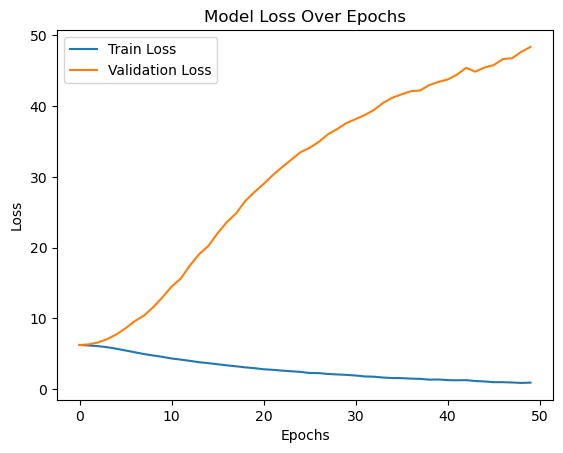

In [32]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Epochs")
plt.legend()
plt.show()


In [34]:
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.preprocessing import StandardScaler, LabelEncoder # for preprocessing tools

# Encode target labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert categorical labels to numeric

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training set: X_train = (400, 449), y_train = (400,)
Testing set: X_test = (100, 449), y_test = (100,)


In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout # for building neural networks
import keras_tuner as kt # for hyperparameter optimization

# Function to build the model with hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()
    
    # Input layer 
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    
    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):  # Trying 1 to 3 hidden layers
        model.add(Dense(hp.Int(f'units_{i+2}', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i+2}', 0.1, 0.5, step=0.1)))  # Random dropout values
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="LOG")
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [38]:
# Define the tuner using Random Search
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy', # validation accuracy
    max_trials=10,  # Number of different models to try
    executions_per_trial=1,  # Number of times to evaluate each model
    directory='hyperparam_tuning', # saving result in the directory
    project_name='mlp_tuning' # name of the project
)

# Run the hyperparameter search with 20 training epochs per model
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)


Reloading Tuner from hyperparam_tuning\mlp_tuning\tuner0.json


In [46]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

# Evaluate on test data
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.0000e+00 - loss: 6.8339 - val_accuracy: 0.0000e+00 - val_loss: 6.3260
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 7.4608e-04 - loss: 6.2883 - val_accuracy: 0.0000e+00 - val_loss: 6.3242
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.0068 - loss: 6.2218 - val_accuracy: 0.0000e+00 - val_loss: 6.4153
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0000e+00 - loss: 6.1695 - val_accuracy: 0.0000e+00 - val_loss: 6.4944
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.0000e+00 - loss: 6.1756 - val_accuracy: 0.0000e+00 - val_loss: 6.5813
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.0000e+00 - loss: 6.1651 - val_accuracy: 0.0000e+00 - val_loss: 6.5817
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0037 - loss: 6.0807 - val_accuracy: 0.0000e+00 - val_loss: 6.5932
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 

# TASK 4

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on test data 
y_pred = best_model.predict(X_test)




4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step


In [56]:
# Shape of predicted values and actual test labels
print("y_pred shape:", y_pred.shape)  
print("y_test shape:", y_test.shape)  


y_pred shape: (49700,)
y_test shape: (100,)


In [58]:
y_pred = y_pred.flatten()


In [60]:
# Ensure y_pred has the same length as y_test
y_pred = y_pred[:len(y_test)]


In [62]:
#  regression evaluation metrics
mae = mean_absolute_error(y_test, y_pred) # Measures average absolute error
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Measures root mean squared error
r2 = r2_score(y_test, y_pred) # Measures how well predictions fit actual values


In [66]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R² Score
r2 = r2_score(y_test, y_pred)

print(f" Mean Absolute Error (MAE): {mae:.4f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f" R² Score: {r2:.4f}")


 Mean Absolute Error (MAE): 288.6078
 Root Mean Squared Error (RMSE): 323.2067
 R² Score: -3.9349


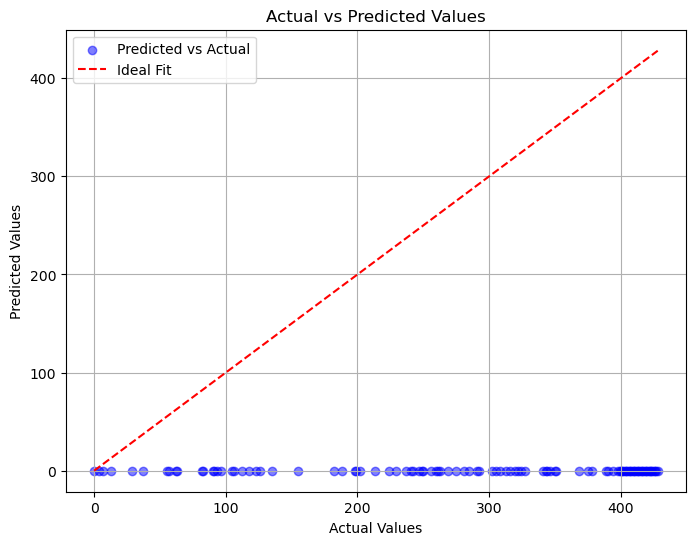

In [108]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predicted vs Actual")

# Plot y=x line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Ideal Fit")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()
